# Hierarchical Clustering

In [5]:
# =============================================================================
# Hierarchical Clustering
# =============================================================================

# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Dataset
dataset = pd.read_csv('CC_GENERAL.csv', encoding='utf-8')
X = dataset[["BALANCE", "PURCHASES"]].values


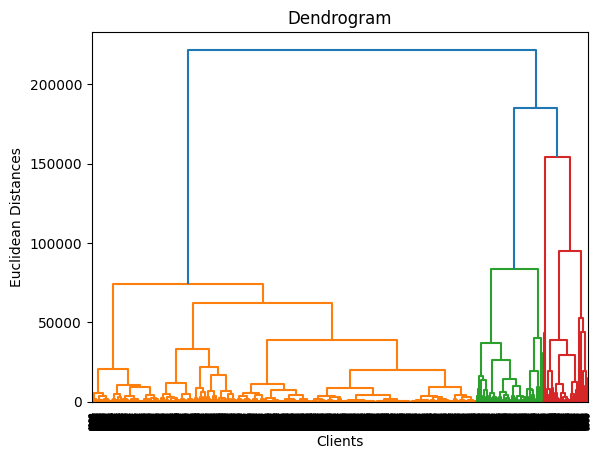

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


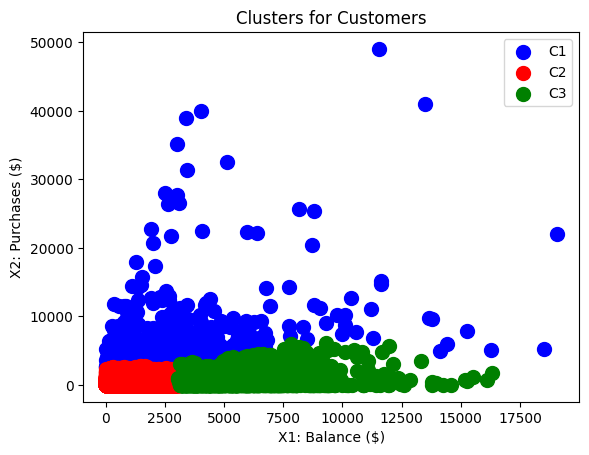

In [6]:
### Dendrogram to have the optimal number of clusters
# A new library is going to be used, and with that I seek to see the optimal number of clusters
import scipy.cluster.hierarchy as sch

# The 'ward' method is used which tries to minimize the variance between clusters.
# Instead of minimizing the WC minimal square, it is done with the variance -> minimize the variance in each cluster
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Clients')
plt.ylabel('Euclidean Distances')
plt.show()

# Train the algorithm with the data from the set
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X) # With fit_predict you get the cluster assigned to each point

### View clusters (they are plotted one by one)
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'blue', label = 'C1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'red', label = 'C2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'C3')

# Plot Centroids
plt.title('Clusters for Customers')
plt.xlabel('X1: Balance ($)')
plt.ylabel('X2: Purchases ($)')
plt.legend()
plt.show()